# 워드클라우드 (한글)

## 형태소 분석의 이해

### 형태소

- 의미가 있는 최소의 단위(minimally meaningful unit)
- 문법적, 관계적인 뜻을 나타내는 단어 또는 단어의 부분
- 일정한 범위 안에서 쓰이는 낱말의 총체

문법적으로 더 이상 나눌 수 없는 언어 요소를 형태소라고 한다.

영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야 한다. (konlpy, mecab 등)

### 형태소 분석 예시

#### 형태소 사전에 수록된 어휘를 기준으로 분석

```plain
사랑하다 = 사랑 + 하 + 다, 사랑하 + 다
알뜰하다 = 알뜰 + 하 + 다, 알뜰하 + 다
```

## #01. KoNLPy(OKT)를 사용한 형태소 분석

KoNLPy는 한국어 정보처리를 위한 파이썬 패키지

자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이 때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지

JAVA를 기반으로 만들어져 있어서 패키지 설치를 위해서는 JAVA 개발 환경이 구성되어 있어야 한다.

### 현재 컴퓨터의 java 환경 구성여부 확인

```shell
$ javac --version
```

설치가 필요한 경우 아래와 같이 에러 메시지가 표시된다.

```plain
'javac'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
```

### OpenJDK 다운로드

권장 버전은 `19`

[https://jdk.java.net/19/](https://jdk.java.net/19/) 페이지에서 자신의 버전에 맞는 파일을 내려 받는다.

다운로드 받은 파일을 적절한 위치에 압축 해제한다.

#### 예

```
C:\jdk-19.0.2
```

### 환경변수 설정

#### 환경변수 입력 화면 열기

1. 폴더창 좌측 트리에서 `내 PC` 마우스 우클릭 하여 `속성` 메뉴 선택
2. `설정`화면이 나타나면 오른쪽에서 `고급 시스템 설정` 클릭
3. 나타난 화면 하단의 `환경 변수` 버튼 클릭

#### `JAVA_HOME` 변수 추가

1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `새로 만들기` 버튼 클릭
2. 변수 이름에 `JAVA_HOME`
3. 변수 값에 JDK의 경로 입력
    - 예: `C:\jdk-19.0.2`
4. `확인`을 눌러 입력창 닫기

#### `Path` 변수 추가

1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `Path` 항목을 찾아 선택하고 `편집`버튼 클릭
2. 맨 아래 빈 행을 더블클릭 하여 입력 상태로 만들고 JDK 설치 폴더 내의 `bin` 디렉토리까지의 경로를 입력
    - 예: `C:\jdk-19.0.2\bin`
3. `확인`을 눌러 모든 창 닫기

명령 프롬프트, 폴더창, VSCode 등 모든 프로그램을 닫은 후 명령 프롬프트에서 `javac --version` 명령으로 설정이 잘 되었는지 확인

### 형태소 분석 설치

`konlpy` 패키지 설치가 필요하다.
cmd에 pip install konlpy

In [50]:
from IPython.display import Image, display
from konlpy.tag import Okt
from wordcloud import WordCloud
import sys
import os

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

# 직접 구현한 모듈 참조
# 소스파일의 위치에 따라 `os.path.dirname` 사용 횟수 조절 필요
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import clearStopwords

# 금지어 설정 모듈
from wordcloud import STOPWORDS

In [51]:
# 형태소 분석 객체 생성
nlp = Okt()

In [52]:
# sample = '안녕'
# # 명사들만 추출
# nouns = nlp.nouns(sample)
# print(nouns)

In [53]:
# 사전 구축하기 
import konlpy
konlpy.data.path # 데이터 경로 가져오기
# C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\konlpy\data

['C:\\Users\\User/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\konlpy_data',
 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\lib\\konlpy_data',
 'C:\\Users\\User\\AppData\\Roaming\\konlpy_data',
 'C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\konlpy/data']

konlpy 설치위치 하위에 java라는 폴더에서 
open-korean-text-2.1.0.jar 
압축을 해제한다.
폴더 안에 들어가면 -> 
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\konlpy\java\open-korean-text-2.1.0\org\openkoreantext\processor\util\noun
여기에 한글 단어들이 모여있다.
기존파일을 추가해서 '알잘딱깔센' 같은걸 추가할 수 있다. 
그래서 원본 이름을 백업해두고, 수정한 폴더를 다시 압축 (주소 다 지우고 cmd -> )

사전 = 말뭉치

### 한글 워드클라우드

In [54]:
# 분석할 데이터 가져오기
with open("wordcloud/배달의민족2023트렌드.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    print(text)

[2023외식업트렌드] 금쪽같은 내 한끼
“이 정도 가격에 이 정도 성능이면 뭐 괜찮지" 

우리는 가성비를 따진다며 ‘타협'해왔습니다. 가격 대비 성능이 적당한 것으로요. 완전히 만족하진 않아도, 그래도 저렴하다며 스스로를 다독이기도 했죠. 

 

하지만 요즘 가성비는 효율 극대화에 ‘집중'합니다. 그저 그런 여러 번의 구매보다, 단 한 개의 최고 만족을 누리지요. 다른 것들을 다 포기하고서라도요. 


차라리 굶을래요. 단 한 끼를 위해🔥

이렇게 선택과 집중을 통해 적어도 하루 한 끼는 제대로 먹는 사람들이 있습니다. 한 끼 만큼은 음식을 천천히 음미하거나, 조금 더 지불하고서라도 나의 만족을 최대로 끌어낼 수 있는 식사를 원하죠. 


이는 오히려 그 밖의 끼니들을 신속하고 간편하게 해결할 수 있는 방법이 다양해진 덕분이기도 해요. 빠르게 허기를 채울 수 있는 음식들이 많아졌고, 밀키트로 빠르게 조리할 수도 있지요. 

금쪽같은 내 한 끼를 위해 다른 끼니들은 간단하고 빠르게 해결해요. 





금쪽같은 내 한 끼, 
고객은 이렇게 즐겨요 
1# 한 끼만큼은 천천히  
몇 년 전 삼시세끼라는 프로그램이 큰 인기를 얻었습니다. 

천천히 모든 끼니를 자급자족하는 모습이 인상적이었는데요. 요즘에는 삼시세끼를 모두 제대로 챙겨먹는 사람을 참 만나기 어렵습니다. 두끼만 먹거나, 한끼만 먹는 사람들도 쉽게 만나볼 수 있죠. 


게다가 빠르게 식사를 해결하는 사람들도 많아졌습니다. 쉽게 해결할 수 있는 방법이 다양해졌거든요. 밀키트로 나오지 않는 메뉴가 없고, 배달 음식에서도 덮밥과 같이 빠르게 뚝딱 해결할 수 있는 메뉴들이 이제는 많이 등장했습니다.



2023외식업트렌드_금쪽


하지만 모든 끼니를 빠르게 해결하는 것은 아닙니다. 다른 끼니를 떼운만큼 적어도 한 끼 정도에는 충분한 시간을 들여 즐기려 하거든요. 꼭 식사가 아니더라도 차나 디저트 등을 천천히 음미하면서 여유를 찾기도 하고요. 


나의 식사를 천천히 즐겨요 

호텔 일식당을 중심으로 시작

In [55]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()
nouns = nlp.nouns(text)

In [56]:
# 불용어 
with open('wordcloud/stopwords-ko.txt','r', encoding='utf-8') as f:
    stopwords = f.readlines()
    for i, v in enumerate(stopwords) :
        stopwords[i] = v.strip()
    print(stopwords)

['!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '...', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?', '@', '\\', '^', '_', '`', '|', '~', '·', '—', '——', '‘', '’', '“', '”', '…', '、', '。', '〈', '〉', '《', '》', '가', '가까스로', '가령', '각', '각각', '각자', '각종', '갖고말하자면', '같다', '같이', '개의치않고', '거니와', '거바', '거의', '것', '것과 같이', '것들', '게다가', '게우다', '겨우', '견지에서', '결과에 이르다', '결국', '결론을 낼 수 있다', '겸사겸사', '고려하면', '고로', '곧', '공동으로', '과', '과연', '관계가 있다', '관계없이', '관련이 있다', '관하여', '관한', '관해서는', '구', '구체적으로', '구토하다', '그', '그들', '그때', '그래', '그래도', '그래서', '그러나', '그러니', '그러니까', '그러면', '그러므로', '그러한즉', '그런 까닭에', '그런데', '그런즉', '그럼', '그럼에도 불구하고', '그렇게 함으로써', '그렇지', '그렇지 않다면', '그렇지 않으면', '그렇지만', '그렇지않으면', '그리고', '그리하여', '그만이다', '그에 따르는', '그위에', '그저', '그중에서', '그치지 않다', '근거로', '근거하여', '기대여', '기점으로', '기준으로', '기타', '까닭으로', '까악', '까지', '까지 미치다', '까지도', '꽈당', '끙끙', '끼익', '나', '나머지는', '남들', '남짓', '너', '너희', '너희들', '네', '넷', '년', '논하지 않다', '놀라다', '누가 알겠는가', '누구', '다른', '다른 방면으로', '

In [57]:
# 추출된 명사에서 불용어를 제거함
data_set = []
for v in nouns :
    if v not in stopwords :
        data_set.append(v)
print(data_set)

['외식', '업', '트렌드', '금쪽', '내', '끼', '정도', '가격', '정도', '성능', '이면', '뭐', '가성', '비', '타협', '가격', '대비', '성능', '요', '스스로', '다독', '요즘', '가성', '효율', '대화', '집중', '여러', '번의', '구매', '단', '개', '최고', '만족', '포기', '고서', '요', '단', '끼', '위해', '선택', '집중', '통해', '하루', '제대로', '사람', '끼', '음식', '음미', '거나', '더', '지불', '고서', '만족', '최대로', '낼', '수', '식사', '밖', '끼니', '해결', '수', '방법', '덕분', '해', '허기', '수', '음식', '밀', '키트', '조리', '수도', '금쪽', '내', '끼', '위해', '끼니', '해결', '금쪽', '내', '끼', '고객', '끼', '전', '시세', '끼', '프로그램', '인기', '모든', '끼니', '자급자족', '모습', '인상', '요즘', '시세', '끼', '제대로', '사람', '끼', '끼', '사람', '나볼', '수', '식사', '해결', '사람', '해결', '수', '방법', '밀', '키트', '메뉴', '배달', '음식', '밥', '뚝딱', '해결', '수', '메뉴', '이제', '등장', '외식', '업', '트렌드', '금쪽', '모든', '끼니', '해결', '끼니', '끼', '정도', '꼭', '식사', '차', '디저트', '음미', '여유', '찾기', '식사', '호텔', '식당', '중심', '시작', '마카', '뜻', '일본어', '요', '셰프', '모든', '메뉴', '진행', '식사', '이야기', '셰프', '메뉴', '조리', '방법', '식', '재료', '소개', '입맛', '더', '고급', '문화', '마카', '세', '끼', '사람', '이제', '가격', '메뉴', '마카', '세', 

In [58]:
# helper.py에 모듈화 한 기능 테스트
data_set = clearStopwords(nouns)

In [59]:
count = Counter(data_set)
def get_color(word, font_size, position, orientation, random_state=None, **kwargs) :
    color = '#BB2649' 
    return color

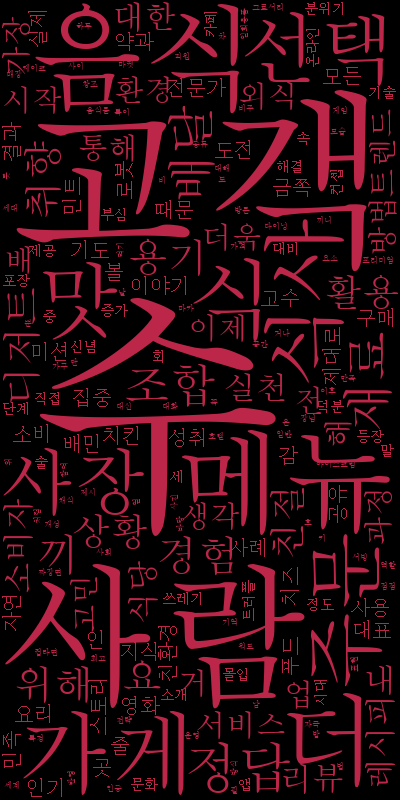

In [66]:
# 금지어 설정 -> 필요한만큼 add()함수를 호출하여 추가
ignore = set(STOPWORDS) #SET으로 담아옴
ignore.add('수')
ignore.add('더')

# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path="./wordcloud/batang.ttc",width=200,height=400,scale=2.0,stopwords=ignore,background_color="#000000")

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)

wc.recolor(color_func=get_color, random_state=True)
wc.to_file("음식.png")
display(Image(filename='음식.png'))

In [61]:
# 이미지 처리 모듈 (파이썬 기본 내장)
from PIL import Image as Img
import numpy as np

In [62]:
img = Img.open('wordcloud/앨리스배경.png')
iarr = np.array(img)
iarr

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)